In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df=pd.read_csv("c:\\Users\\admin\\Downloads\\Insurance_dataset.csv")

In [4]:
df.isnull().sum()

Age                   0
BMI                   0
Smoker                0
Number_of_Children    0
Gender                0
Region                0
Insurance_Cost        0
dtype: int64

* THE OTHER WAY TO DO THE BELOW THREE STEPS OF DATA CAN BE DONE USING LABEL ENCODER
FOR THIS WE NEED TO IMPORT LABEL ENCODER FROM SKLEARN.PREPROCESSING 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()




df["Gender]=le.fit_transform(df["Gender])



df["Region"]=le.fit_transform(df["Region"])



df["Smoker"]=le.fit_transform(df["Smoker"])

In [5]:
df["Gender"]=df["Gender"].map({"male":0,"female":1})

In [6]:
df["Region"]=df["Region"].map({"southeast":0,"southwest":1,"northeast":2,"northwest":3})

In [7]:
df["Smoker"]=df["Smoker"].map({"no":0,"yes":1})

In [8]:
df.isnull().sum()

Age                   0
BMI                   0
Smoker                0
Number_of_Children    0
Gender                0
Region                0
Insurance_Cost        0
dtype: int64

## WE CAN SELECT THE FEATURE VARIABLE AND TARGET VARIABE THAT WE HAVE SELECTED BELOW LIIKE THIS TOO:
x=df.drop("Insurance_Cost,axis=1)




y=df["Insurance_Cost"]

In [9]:
x=df.iloc[:,0:6]
y=df.iloc[:,-1]

In [10]:
y

0       1601.28
1       2900.81
2       2249.51
3       1662.48
4       2149.76
         ...   
995     2498.41
996     1210.77
997     1956.99
998     1848.92
999    11758.29
Name: Insurance_Cost, Length: 1000, dtype: float64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
poly=PolynomialFeatures(degree=2)
poly.fit(x_train)

,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [12]:
x_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)


In [13]:
lr=LinearRegression()
lr.fit(x_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred=lr.predict(x_test_poly)


In [15]:
y_test.head(2)

204    1579.42
71     1327.21
Name: Insurance_Cost, dtype: float64

In [16]:
new_data=[[59,28.3,0,1,1,2]]
new_data_poly=poly.transform(new_data)
lr.predict(new_data_poly)

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([1815.09287794])

In [19]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("R2 SCORE:",r2_score(y_test,y_pred))
print("MEAN ABSOLUTE ERROR ",mean_absolute_error(y_test,y_pred))
print("MEAN SQUARED ERROR ",mean_squared_error(y_test,y_pred))

R2 SCORE: 0.9858941450921959
MEAN ABSOLUTE ERROR  371.3978047663242
MEAN SQUARED ERROR  218315.55087684243


### PLOTTING GRAPH TO VISUALIZE DATA.

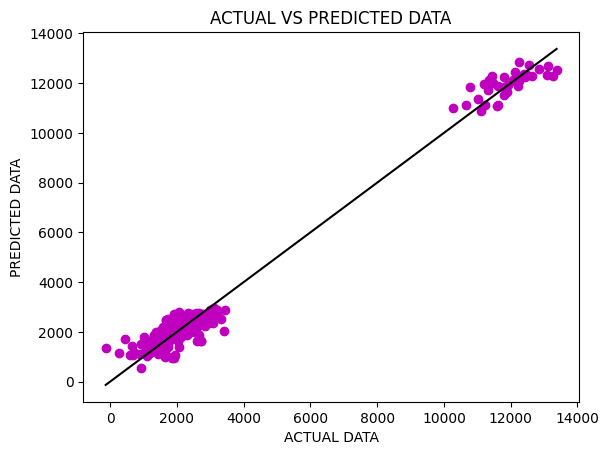

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c="m")
plt.xlabel("ACTUAL DATA")
plt.ylabel("PREDICTED DATA")
plt.title("ACTUAL VS PREDICTED DATA")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c="black")